In [ ]:
%%bash
git clone https://github.com/CSSEGISandData/COVID-19.git
cp ~/Downloads/Downloads/for\ jupyter/forcovid/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv ~/Downloads/Downloads/for\ jupyter/forcovid/
cp ~/Downloads/Downloads/for\ jupyter/forcovid/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv ~/Downloads/Downloads/for\ jupyter/forcovid/
cp ~/Downloads/Downloads/for\ jupyter/forcovid/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv ~/Downloads/Downloads/for\ jupyter/forcovid/

In [1]:
# raw data from JHU
# make it whole
# import libraries

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import warnings
from random import shuffle
warnings.simplefilter('ignore')
pio.templates.default = "plotly_dark"
pio.renderers.default = "svg"

con = pd.read_csv('time_series_covid19_confirmed_global.csv')
con.drop(['Lat','Long'],axis=1,inplace=True)
con = con.melt(id_vars=['Province/State','Country/Region'],var_name='Date',value_name='ConfirmedCases')
con['Date'] = pd.to_datetime(con.Date)
dea = pd.read_csv('time_series_covid19_deaths_global.csv')
dea.drop(['Lat','Long'],axis=1,inplace=True)
dea = dea.melt(id_vars=['Province/State','Country/Region'],var_name='Date',value_name='Fatalities')
dea['Date'] = pd.to_datetime(dea.Date)
rec = pd.read_csv('time_series_covid19_recovered_global.csv')
rec.drop(['Lat','Long'],axis=1,inplace=True)
rec = rec.melt(id_vars=['Province/State','Country/Region'],var_name='Date',value_name='Recovered')
rec['Date'] = pd.to_datetime(rec.Date)
full = con.merge(dea, on=['Province/State','Country/Region','Date'], how='left')
full = full.merge(rec, on=['Province/State','Country/Region','Date'], how='left')
full['Active'] = full.ConfirmedCases -full.Fatalities - full.Recovered

In [2]:
# minor processing
# all kinds of lists
countries =        ['US','Italy','Spain','China','Germany','Iran']
europe_countries = ['Austria','Belgium','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Ireland',
                    'Italy', 'Latvia','Luxembourg','Lithuania','Malta','Norway','Netherlands','Poland','Portugal','Romania','Slovakia','Slovenia',
                    'Spain', 'Sweden', 'United Kingdom', 'Iceland', 'Russia', 'Switzerland', 'Serbia', 'Ukraine', 'Belarus',
                    'Albania', 'Bosnia and Herzegovina', 'Kosovo', 'Moldova', 'Montenegro', 'North Macedonia']
# states =           {'Alabama': 'AL','Alaska': 'AK','American Samoa': 'AS','Arizona': 'AZ','Arkansas': 'AR','California': 'CA',
#                     'Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','District of Columbia': 'DC','Florida': 'FL',
#                     'Georgia': 'GA','Guam': 'GU','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS',
#                     'Kentucky': 'KY', 'Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS',
#                     'Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM',
#                     'New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Northern Mariana Islands':'MP','Ohio': 'OH','Oklahoma': 'OK',
#                     'Oregon': 'OR','Pennsylvania': 'PA','Puerto Rico': 'PR','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD',
#                     'Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virgin Islands': 'VI','Virginia': 'VA','Washington': 'WA',
#                     'West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
list1 = []

# grouped data preparation

globalall = full.groupby('Date').agg({'ConfirmedCases':'sum',
                                       'Fatalities':'sum',
                                       'Recovered':'sum',
                                       'Active':'sum'}).reset_index()



rest = full[~full['Country/Region'].isin(countries)].groupby('Date').agg({'ConfirmedCases':'sum',
                                                                            'Fatalities':'sum',
                                                                            'Recovered':'sum',
                                                                            'Active':'sum'}).reset_index()


# for i in countries:
#     list1.append(full[full['Country/Region']==str(i)].groupby('Date').agg({'ConfirmedCases':'sum',
#                                                                              'Fatalities':'sum',
#                                                                              'Recovered':'sum',
#                                                                              'Active':'sum'}).reset_index())

world = full[full.Date==full.Date.max()].groupby('Country/Region').agg({'ConfirmedCases':'sum',
                                                                           'Fatalities':'sum',
                                                                           'Recovered':'sum',
                                                                           'Active':'sum'}).reset_index()
world['MortalityRate'] = np.round((world.Fatalities/world.ConfirmedCases)*100,2)
world['RecoveryRate'] = np.round((world.Recovered/world.ConfirmedCases)*100,2)


europe = world[world['Country/Region'].isin(europe_countries)]

# us = full[(full['Country/Region']=='US') &(full.Date==full.Date.max()) ].groupby('Province/State').agg({'ConfirmedCases':'sum',
#                                                                                                             'Fatalities':'sum',
#                                                                                                             'Recovered':'sum',
#                                                                                                             'Active':'sum'}).reset_index()
# us.replace({'Province/State':states},
#            inplace=True)

tempo = globalall.melt(id_vars='Date', value_vars=['Recovered',
                                                   'Fatalities',
                                                   'Active'],
                       var_name='cases',value_name='count')

withoutchina = full[full['Country/Region']!='China'].groupby('Date').agg({'Fatalities':'sum',
                                                                            'Recovered':'sum',
                                                                            'Active':'sum'}).reset_index()

tempo2 = withoutchina.melt(id_vars='Date',value_vars=['Recovered',
                                                      'Fatalities',
                                                      'Active'],var_name='cases',
                           value_name='count')

tempo3 = world[world.ConfirmedCases > 100]

# **Time Lapse Of Events**

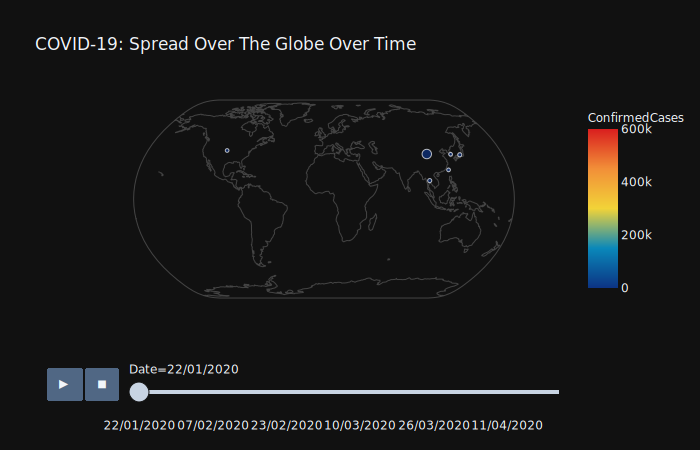

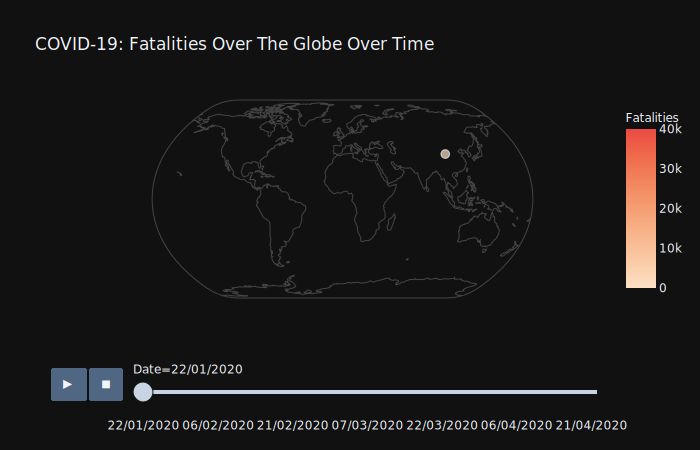

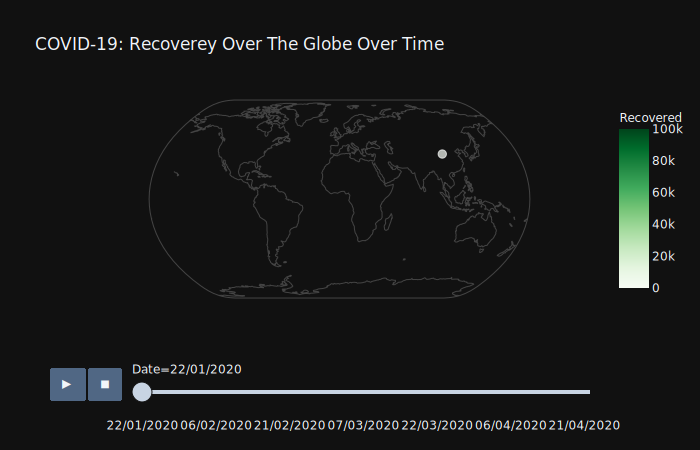

In [3]:
newgroup = full.groupby(['Date','Country/Region']).agg({'ConfirmedCases':'sum','Fatalities':'sum','Recovered':'sum'}).reset_index()
newgroup['Date'] = newgroup.Date.dt.strftime('%d/%m/%Y')
newgroup['csize'] = newgroup['ConfirmedCases'].pow(0.3)
newgroup['fsize'] = newgroup['Fatalities'].pow(0.3)
newgroup['rsize'] = newgroup['Recovered'].pow(0.3)
f1 = px.scatter_geo(newgroup,locations='Country/Region',locationmode='country names', color='ConfirmedCases',
              size='csize', hover_name='Country/Region', range_color=[1,600000], projection='natural earth',
              animation_frame='Date',title='COVID-19: Spread Over The Globe Over Time', color_continuous_scale='portland')

f2 = px.scatter_geo(newgroup,locations='Country/Region',locationmode='country names', color='Fatalities',
              size='fsize', hover_name='Country/Region', range_color=[1,40000], projection='natural earth',
              animation_frame='Date',title='COVID-19: Fatalities Over The Globe Over Time', color_continuous_scale='peach')
f3 = px.scatter_geo(newgroup,locations='Country/Region',locationmode='country names', color='Recovered',
              size='rsize', hover_name='Country/Region', range_color=[1,100000], projection='natural earth',
              animation_frame='Date',title='COVID-19: Recoverey Over The Globe Over Time', color_continuous_scale='greens')
f1.show()
f2.show()
f3.show()

# **Confirmed Cases**

## **1.1 Worldwide Confirmed Cases**

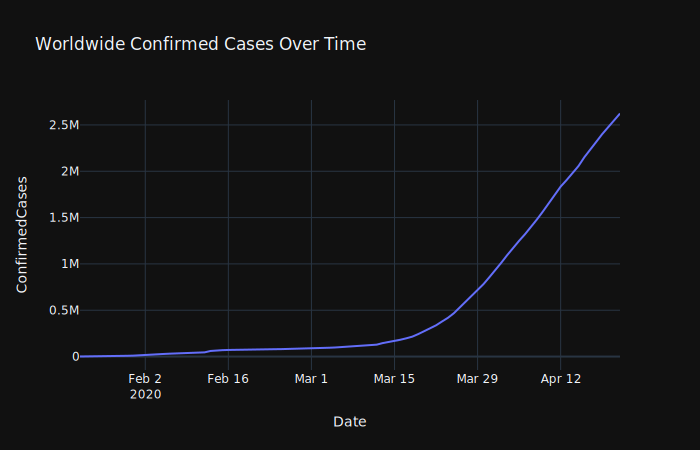

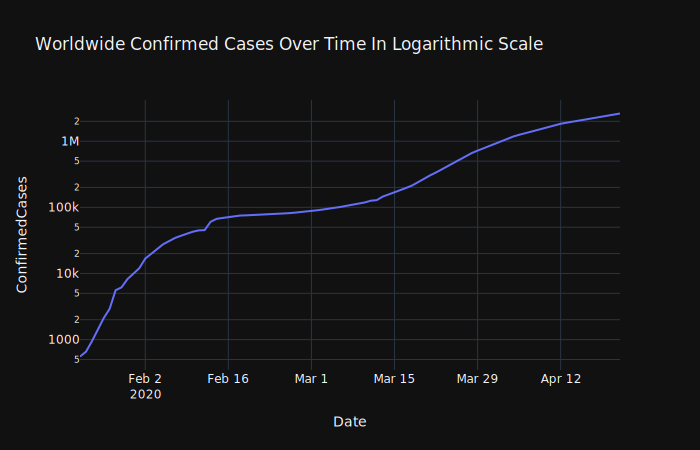

In [4]:
f1 = px.line(globalall, x='Date', y='ConfirmedCases', title='Worldwide Confirmed Cases Over Time')
f2 = px.line(globalall, x='Date',y='ConfirmedCases',title='Worldwide Confirmed Cases Over Time In Logarithmic Scale',log_y=True)
f1.show()
f2.show()

## **1.2 Confirmed Cases Over Time By Countries**

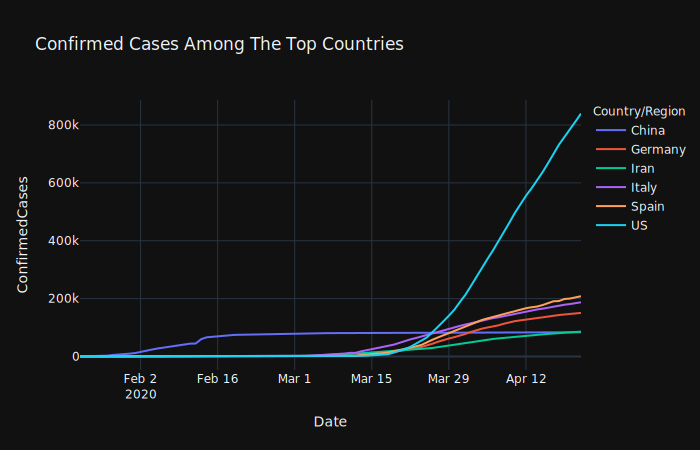

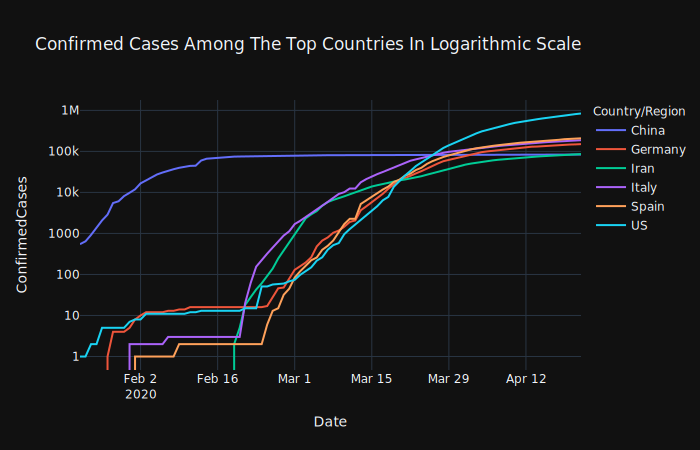

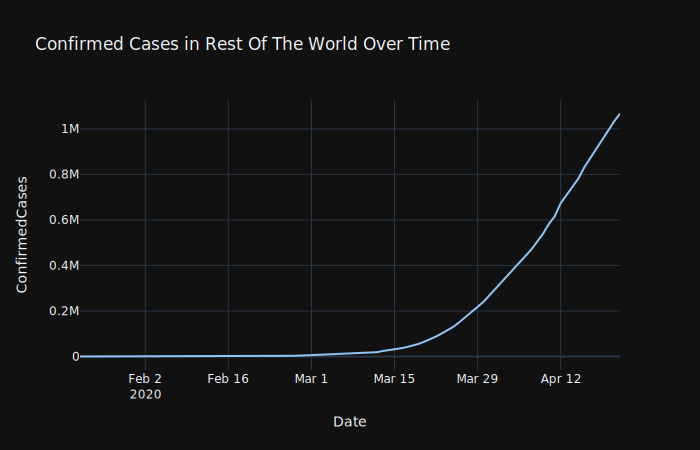

In [5]:
#shuffle(px.colors.sequential.Plasma)
# for j,k,l in zip(list1,countries,px.colors.sequential.Plasma):
#     fig = px.line(j,x='Date',y='ConfirmedCases',title=f'Confirmed Cases in {k} Over Time',
#                   color_discrete_sequence=[l],height=500)
#     fig.show()
confirmed = full.groupby(['Country/Region','Date'])[['ConfirmedCases']].sum().reset_index()
fig1=px.line(confirmed[confirmed['Country/Region'].isin(countries)], x='Date',y='ConfirmedCases',color='Country/Region',title='Confirmed Cases Among The Top Countries',height=800)
fig2=px.line(confirmed[confirmed['Country/Region'].isin(countries)], x='Date',y='ConfirmedCases',color='Country/Region',title='Confirmed Cases Among The Top Countries In Logarithmic Scale',log_y=True,height=800)
fig3 = px.line(rest,x='Date',y='ConfirmedCases',title='Confirmed Cases in Rest Of The World Over Time',
                  color_discrete_sequence=['#91C4F2'],height=500)
fig1.show()
fig2.show()
fig3.show()

## **1.3 Shown in World Map**

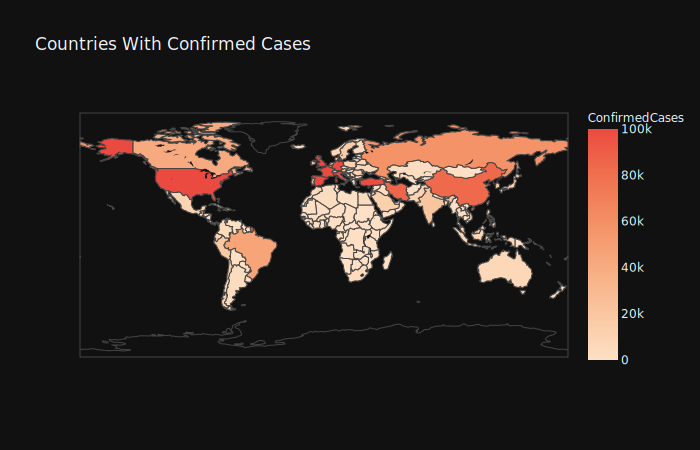

In [6]:
px.choropleth(world, locations='Country/Region', locationmode='country names',color='ConfirmedCases',
             hover_name='Country/Region',range_color=[1,100000],color_continuous_scale='peach',
             title='Countries With Confirmed Cases')

## **1.4 Shown in Europe**

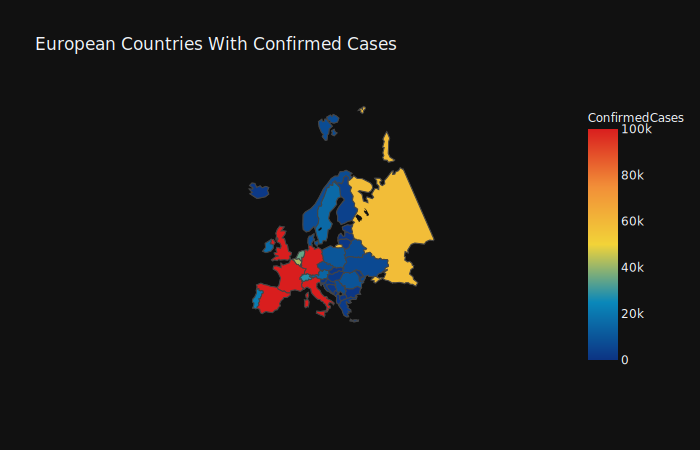

In [7]:
px.choropleth(europe, locations='Country/Region', locationmode='country names',color='ConfirmedCases',
             hover_name='Country/Region',range_color=[1,100000],color_continuous_scale='portland', scope='europe',
             title='European Countries With Confirmed Cases', height=700)

<!-- ## **1.5 Shown in United States** -->

In [8]:
# px.choropleth(us, locations='Province/State', locationmode='USA-states',color='ConfirmedCases',
#               range_color=[1,3000],color_continuous_scale='reds', scope='usa',
#              title='United States With Confirmed Cases', height=700)

## **1.5 Shown in Bar Chart**

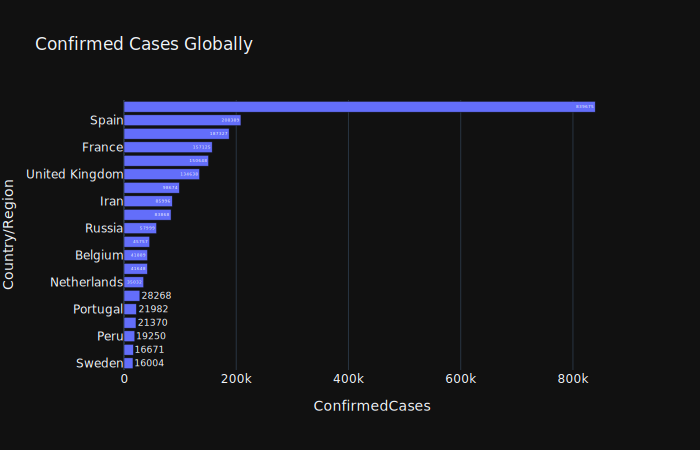

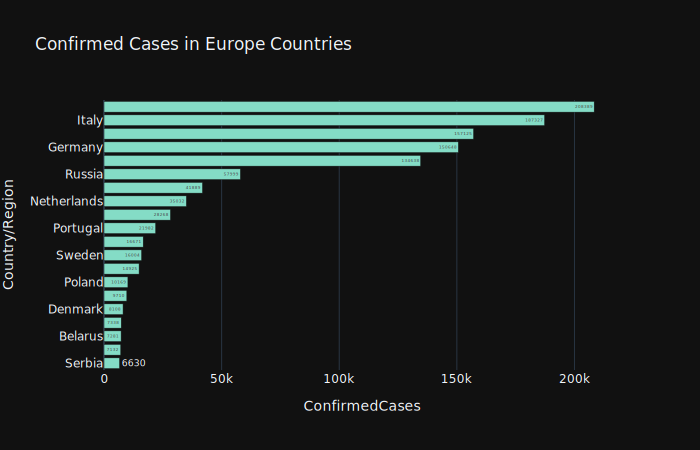

In [9]:
f1 = px.bar(world.sort_values('ConfirmedCases',ascending=False)[:20][::-1],x='ConfirmedCases',
            y='Country/Region',title='Confirmed Cases Globally',height=1000, orientation='h',text='ConfirmedCases')
f2 = px.bar(europe.sort_values('ConfirmedCases',ascending=False)[:20][::-1],x='ConfirmedCases',
           y='Country/Region', title='Confirmed Cases in Europe Countries',height=1000, orientation='h', text='ConfirmedCases',
           color_discrete_sequence=['#84DCC6'])
# f3 = px.bar(us.sort_values('ConfirmedCases',ascending=False)[:20][::-1],x='ConfirmedCases',
#            y='Province/State', title='Confirmed Cases in United States',height=1000, orientation='h', text='ConfirmedCases',
#            color_discrete_sequence=['#D63230'])
f1.show()
f2.show()
#f3.show()

# **Fatalities**

## **2.1 Confirmed Fatalities Globally**

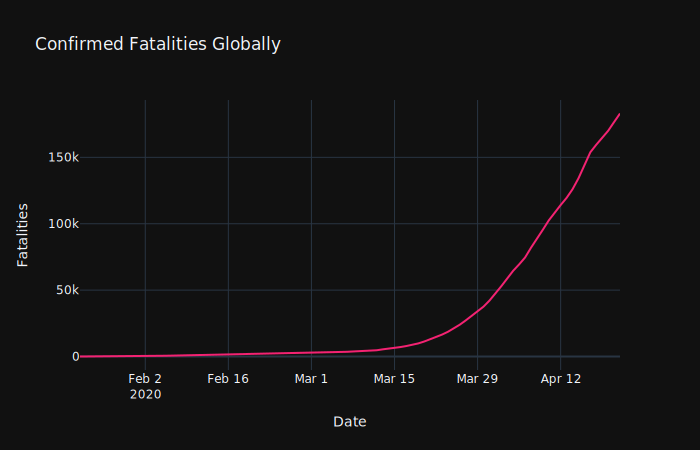

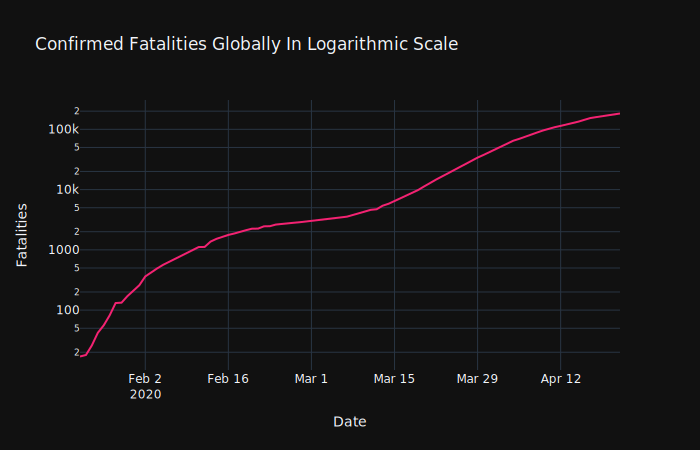

In [10]:
f1 = px.line(globalall, x='Date',y='Fatalities',title='Confirmed Fatalities Globally'
             ,color_discrete_sequence=['#F42272'])
f2 = px.line(globalall, x='Date',y='Fatalities',title='Confirmed Fatalities Globally In Logarithmic Scale'
             ,color_discrete_sequence=['#F42272'],log_y=True)
f1.show()
f2.show()

## **2.2 Fatalities By Countries**

In [ ]:
# shuffle(px.colors.sequential.Plasma)

# for j,k,l in zip(list1,countries,px.colors.sequential.Plasma):
#     fig = px.line(j,x='Date',y='Fatalities',title=f'Fatalities in {k} Over Time',
#                   color_discrete_sequence=[l],height=500)
#     fig.show()
fatal = full.groupby(['Country/Region','Date'])[['Fatalities']].sum().reset_index()
fig1 = px.line(fatal[fatal['Country/Region'].isin(countries)], x='Date',y='Fatalities',title='Fatalities Among The Top Countries',color='Country/Region',height=800)
fig2 = px.line(fatal[fatal['Country/Region'].isin(countries)], x='Date',y='Fatalities',title='Fatalities Among The Top Countries In Logarithmic Scale',color='Country/Region',height=800,log_y=True)

fig3 = px.line(rest,x='Date',y='Fatalities',title='Fatalities in Rest Of The World Over Time',
                  color_discrete_sequence=['#91C4F2'],height=500)
fig1.show()
fig2.show()
fig3.show()


## **2.3 Shown In Worldmap**

In [ ]:
px.choropleth(world,locations='Country/Region',locationmode='country names',color='Fatalities',
             hover_name='Fatalities',range_color=[1,20000], color_continuous_scale='peach',
             title='Countries With Reported Fatalities')

## **2.4 Shown In Europe**

In [ ]:
px.choropleth(europe, locations='Country/Region', locationmode='country names',color='Fatalities',
             hover_name='Country/Region',range_color=[1,15000],color_continuous_scale='portland', scope='europe',
             title='European Countries With Confirmed Cases', height=700)

## **2.5 Shown In United States** 

In [ ]:
# px.choropleth(us, locations='Province/State', locationmode='USA-states',color='Fatalities',
#               range_color=[1,100],color_continuous_scale='reds', scope='usa',
#               title='United States With Confirmed Cases', height=700)

## **2.6 Shown In Bar Chart**

In [ ]:
f1 = px.bar(world.sort_values('Fatalities',ascending=False)[:20][::-1],x='Fatalities',
            y='Country/Region',title='Confirmed Fatalities Globally',height=1000, orientation='h',text='Fatalities')
f2 = px.bar(europe.sort_values('Fatalities',ascending=False)[:20][::-1],x='Fatalities',
           y='Country/Region', title='Confirmed Fatalities in Europe Countries',height=1000, orientation='h', text='Fatalities',
           color_discrete_sequence=['#84DCC6'])
# f3 = px.bar(us.sort_values('Fatalities',ascending=False)[:20][::-1],x='Fatalities',
#            y='Province/State', title='Confirmed Fatalities in United States',height=1000, orientation='h', text='Fatalities',
#            color_discrete_sequence=['#D63230'])
f1.show()
f2.show()
#f3.show()

# **Recovered**

## **3.1 Recovered Cases Worldwide**

In [ ]:
f1 = px.bar(world.sort_values('Recovered',ascending=False)[:20][::-1],x='Recovered',
            y='Country/Region',title='Confirmed Recovered Cases Globally',height=1000, orientation='h',text='Recovered')
f2 = px.bar(europe.sort_values('Recovered',ascending=False)[:20][::-1],x='Recovered',
           y='Country/Region', title='Confirmed Recovered in Europe Cases Countries',height=1000, orientation='h', text='Recovered',
           color_discrete_sequence=['#84DCC6'])

f1.show()
f2.show()

## **3.2 Recoveries In Countries**

In [ ]:
reco = full.groupby(['Country/Region','Date'])[['Recovered']].sum().reset_index()
fig1=px.line(reco[reco['Country/Region'].isin(countries)],x='Date',y='Recovered',title='Recoveries Among The Top Countries',height=800,color='Country/Region')
fig2=px.line(reco[reco['Country/Region'].isin(countries)],x='Date',y='Recovered',title='Recoveries Among The Top Countries In Logarithmic Scale',height=800,color='Country/Region',log_y=True)
fig1.show()
fig2.show()

# **Active Cases**

## **4.1 Shown in Bar Chart**

In [ ]:
f1 = px.bar(world.sort_values('Active',ascending=False)[:20][::-1],x='Active',
            y='Country/Region',title='Confirmed Active Cases Globally',height=1000, orientation='h',text='Active')
f2 = px.bar(europe.sort_values('Active',ascending=False)[:20][::-1],x='Active',
           y='Country/Region', title='Confirmed Active Cases in Europe Countries',height=1000, orientation='h', text='Active',
           color_discrete_sequence=['#84DCC6'])

f1.show()
f2.show()

# **Comparison Between Cases**

## **5.1 Worldwide Cases**

In [ ]:
f1=px.line(tempo,x='Date',y='count',color='cases',title='Cases Over Time: Line Plot',
           color_discrete_sequence=['cyan','red','orange'])
f2=px.area(tempo, x="Date", y="count", color='cases',title='Cases Over Time: Area Plot', 
           color_discrete_sequence = ['cyan', 'red', 'orange'])
f1.show()
f2.show()

## **5.2 Excluding China Cases**

In [ ]:
f1=px.line(tempo2,x='Date',y='count',color='cases',title='Cases Over Time (Without China): Line Plot',
           color_discrete_sequence=['cyan','red','orange'])
f2=px.area(tempo2, x="Date", y="count", color='cases',title='Cases Over Time (Without China): Area Plot', 
           color_discrete_sequence = ['cyan', 'red', 'orange'])
f1.show()
f2.show()

# **Mortality And Recovery Rates**

In [ ]:
f1=px.bar(tempo3.sort_values('MortalityRate', ascending=False)[:10][::-1],
        x = 'MortalityRate', y = 'Country/Region', 
        title='Highest Fatality Rate 100 Confirmed Cases', text='MortalityRate', height=800, orientation='h',
        color_discrete_sequence=['darkred'])

f2=px.bar(tempo3.sort_values('RecoveryRate', ascending=False)[:10][::-1],
        x = 'RecoveryRate', y = 'Country/Region', 
        title='Highest Recovery Rate 100 Confirmed Cases', text='RecoveryRate', height=800, orientation='h',
        color_discrete_sequence=['#2ca02c'])

f1.show()
f2.show()